In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_citeseer_sim = pd.read_csv('citeseer_cosine_weights1.csv')

In [3]:
df_nodes=pd.read_csv('citeseer_labels.csv')

In [4]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_citeseer['weight'] = scaler.fit_transform(df_citeseer[['weight']])#
#df_citeseer.head()

In [5]:
df_citeseer = df_citeseer_sim[['source','target','weight']]
df_citeseer['weight']= 1 - df_citeseer['weight']
#df_citeseer_sim['weight']= 1 / df_citeseer_sim['weight']
df_citeseer.head()

,source,target,weight
0,0,628,0.004793
1,1,158,0.001171
2,1,486,0.002432
3,1,1097,0.003438
4,1,2919,0.001575


In [6]:
df_citeseer.describe()

,source,target,weight
count,4552.000000,4552.000000,4.552000e+03
mean,1081.098638,2182.279218,3.284203e-03
std,781.370218,746.369263,4.076951e-03
min,0.000000,61.000000,6.000000e-08
25%,445.750000,1655.750000,1.348185e-03
50%,947.500000,2350.500000,2.224980e-03
75%,1610.250000,2776.250000,3.602000e-03
max,3322.000000,3326.000000,3.473690e-02


In [7]:
citeseer_graph= nx.from_pandas_edgelist(df_citeseer, 'source', 'target', create_using=nx.DiGraph())

In [8]:
citeseer_graph.number_of_edges()

4552

In [9]:
GNN_dist= nx.from_pandas_edgelist(df_citeseer, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [10]:
GNN_sim= nx.from_pandas_edgelist(df_citeseer_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_citeseer

In [63]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [64]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

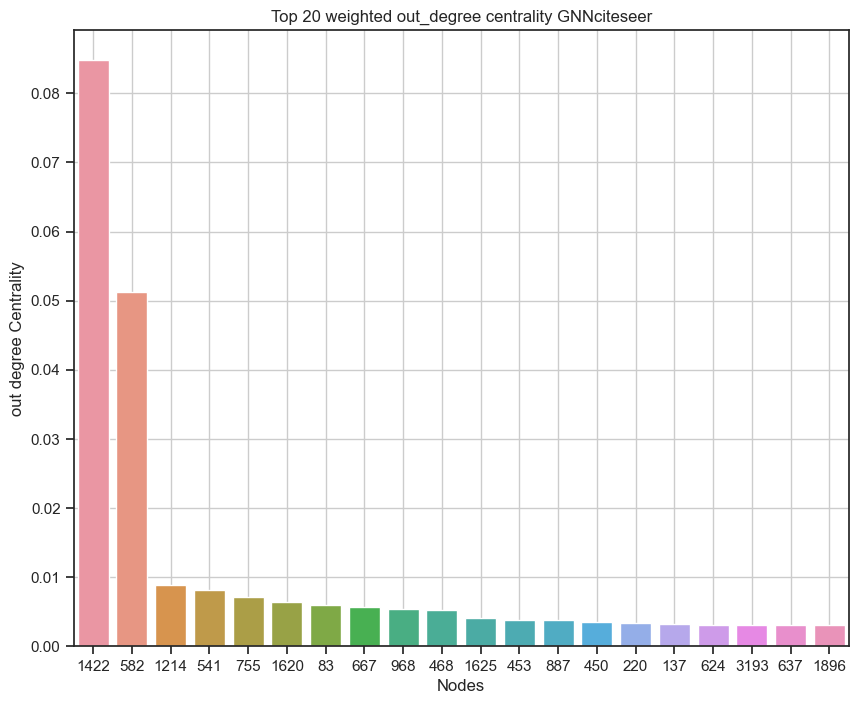

In [65]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNciteseer')
plt.grid()
plt.show()

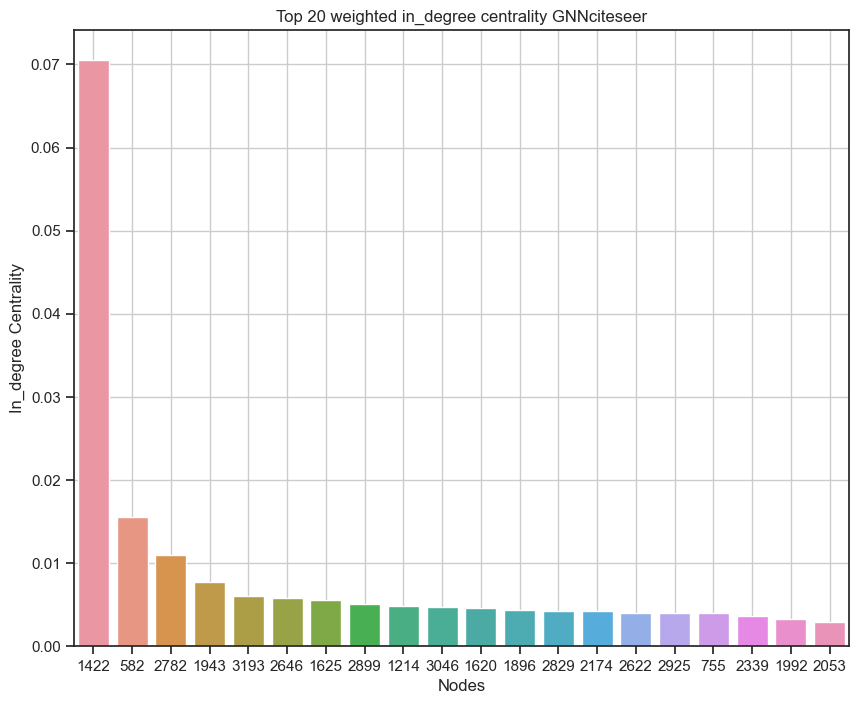

In [66]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNciteseer')
plt.grid()
plt.show()

## citeseer graph

In [67]:
citeseer_out_degree = weighted_out_degree(citeseer_graph)
citeseer_in_degree = weighted_in_degree(citeseer_graph)

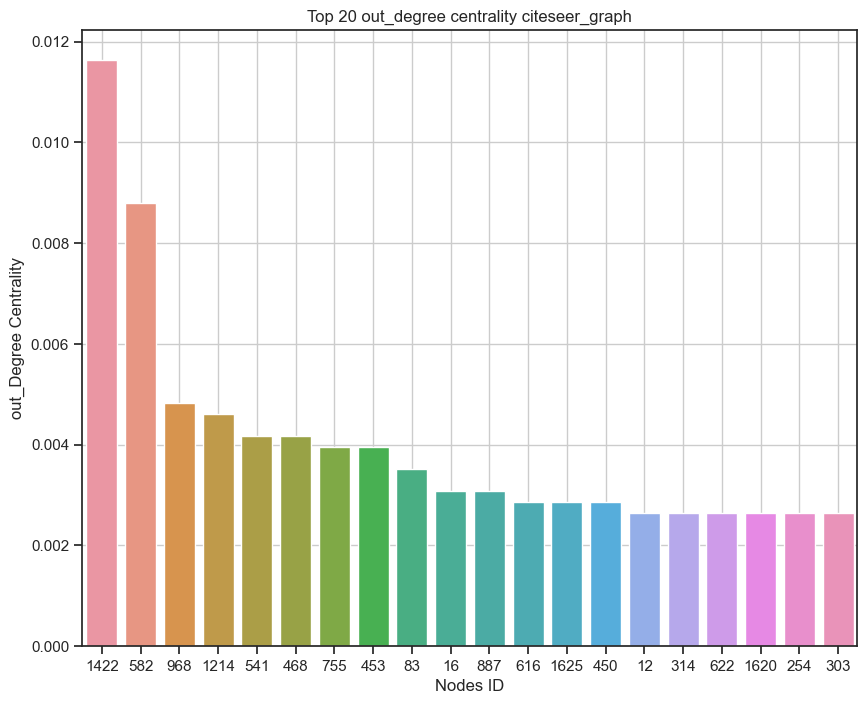

In [68]:

keys = list(map(str,list(citeseer_out_degree.keys())[:20]))
values = list(citeseer_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality citeseer_graph')
plt.grid()
plt.show()

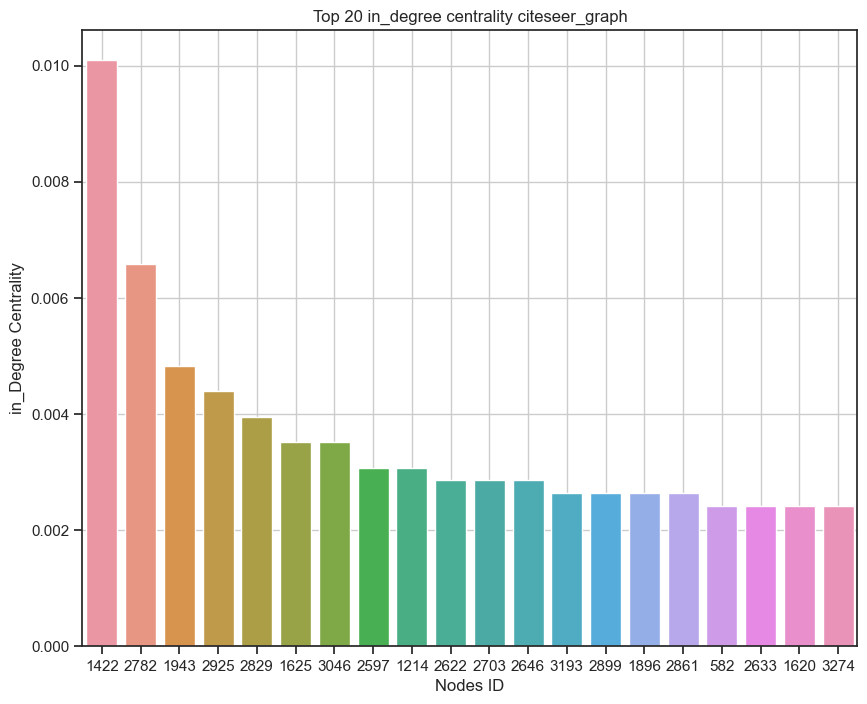

In [69]:
keys = list(map(str,list(citeseer_in_degree.keys())[:20]))
values = list(citeseer_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality citeseer_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_citeseer

In [70]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

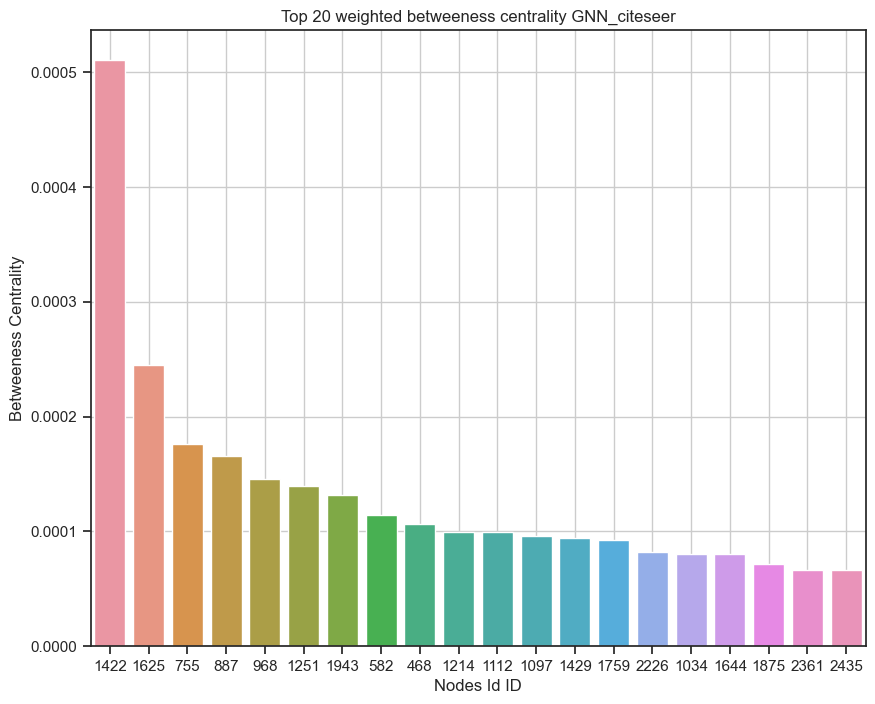

In [71]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_citeseer')
plt.grid()
plt.show()

## citeseer graph

In [72]:
bet_citeseer_graph = nx.betweenness_centrality(citeseer_graph)

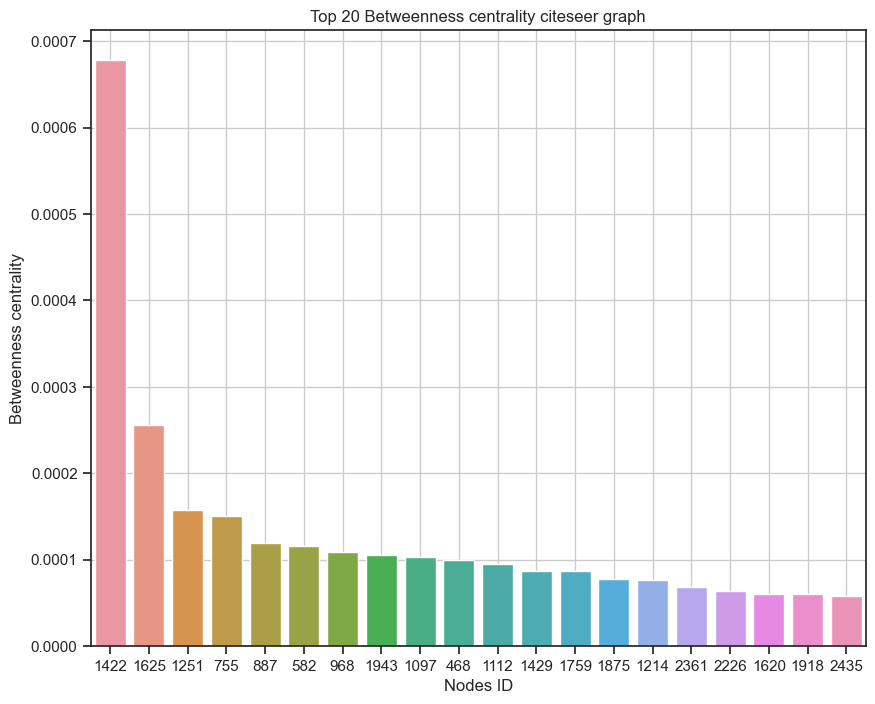

In [73]:
bet_citeseer_graph = dict(sorted(bet_citeseer_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_citeseer_graph.keys())[:20]))
values = list(bet_citeseer_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality citeseer graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_citeseer

In [74]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

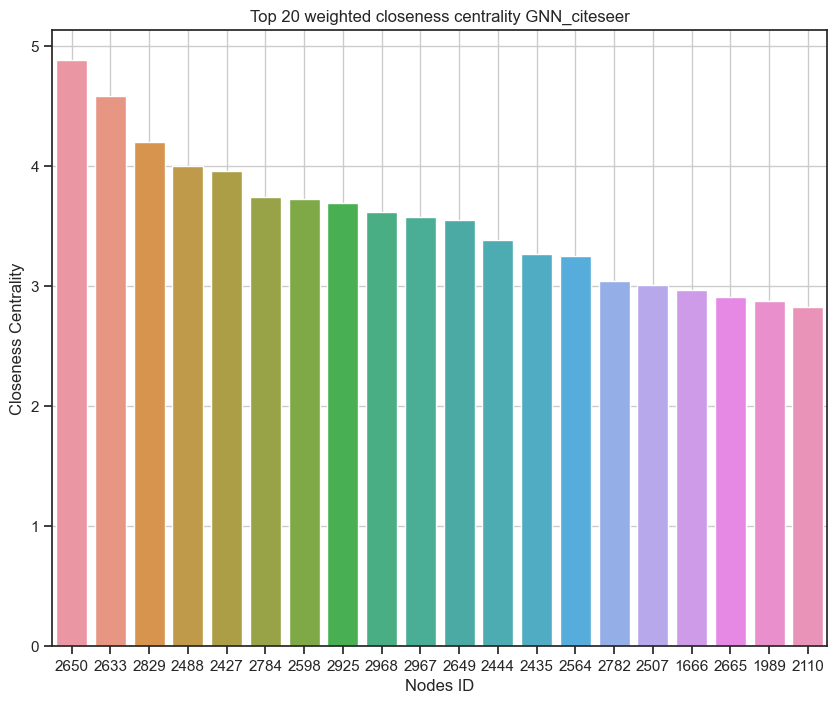

In [75]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_citeseer')
plt.grid()
plt.show()

## citeseer

In [76]:
closeness_citeseer_graph = nx.closeness_centrality(citeseer_graph)

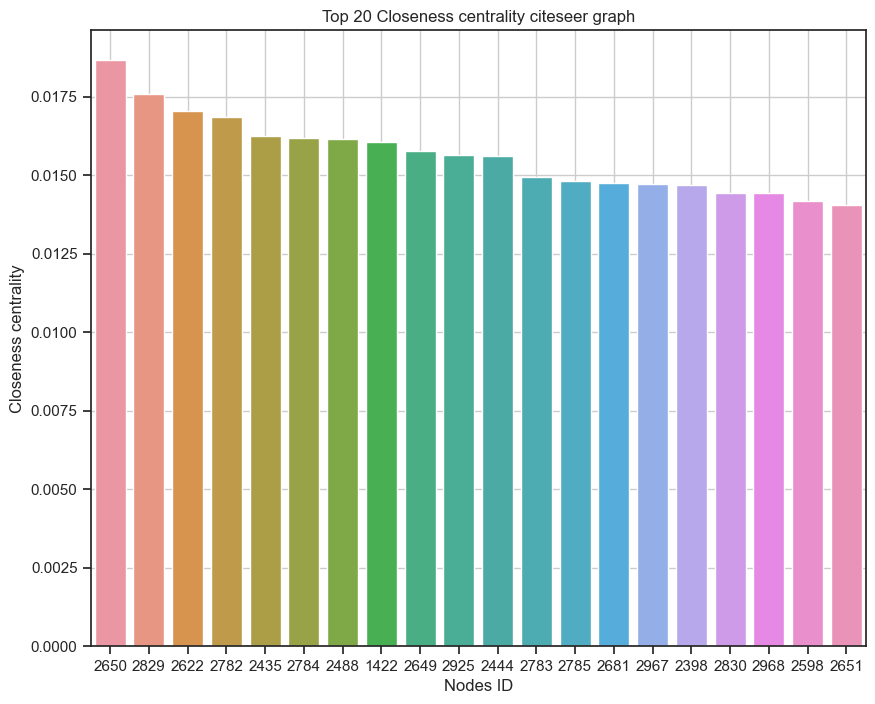

In [77]:
closeness_citeseer_graph = dict(sorted(closeness_citeseer_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_citeseer_graph.keys())[:20]))
values = list(closeness_citeseer_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality citeseer graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_citeseer

In [78]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

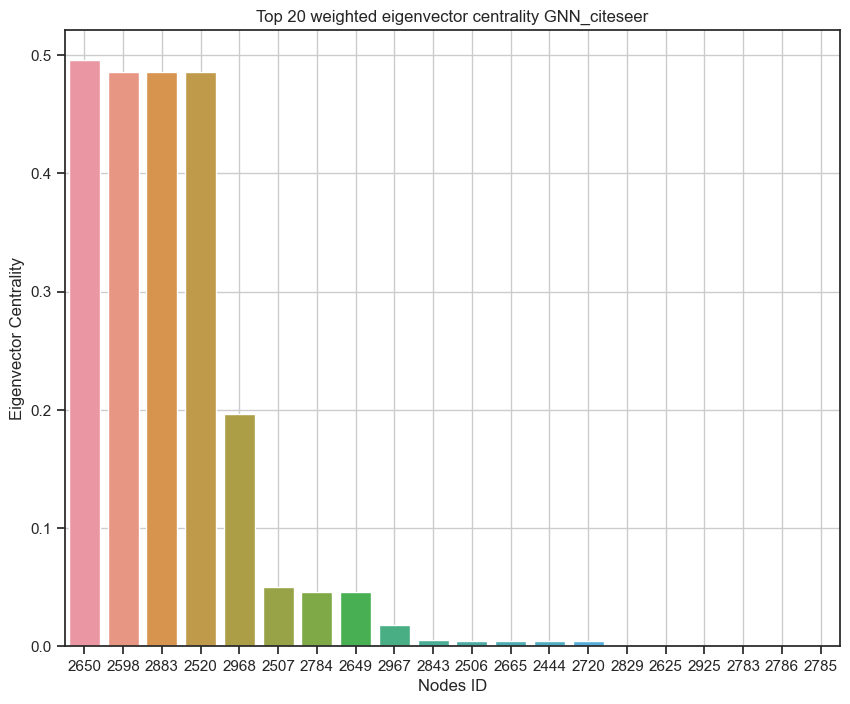

In [79]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_citeseer')
plt.grid()
plt.show()

## citeseer graph

In [80]:
eigen_citeseer_graph = nx.eigenvector_centrality(citeseer_graph, max_iter = 1000)

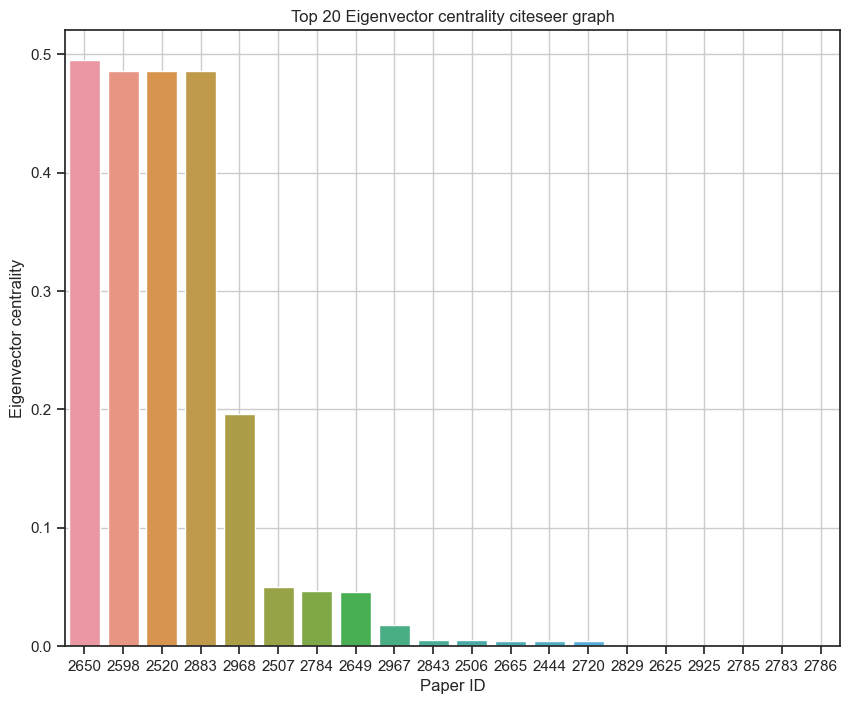

In [81]:
eigen_citeseer_graph = dict(sorted(eigen_citeseer_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_citeseer_graph.keys())[:20]))
values = list(eigen_citeseer_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality citeseer graph')
plt.grid()
plt.show()

# Efficiency

In [11]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [12]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

2.037

In [13]:
weighted_global_efficiency(citeseer_graph)

0.001

## Modularity

In [14]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [15]:
print(weighted_modularty(GNN_sim))

0.872


In [16]:
print(weighted_modularty(citeseer_graph))

0.873


# Community

In [17]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_citeseer = greedy_modularity_communities(citeseer_graph)

In [18]:
print(len(comm_GNN))
print(len(comm_citeseer))

437
442


In [19]:
for c in range(len(comm_GNN)):
    print(len(comm_GNN[c]),len(comm_citeseer[c]),jaccard(comm_GNN[c], comm_citeseer[c]))

378 380 0.6769911504424779
247 244 0.9407114624505929
165 182 0.7794871794871795
150 157 0.91875
144 98 0.2604166666666667
108 83 0.0
83 72 0.0
76 62 0.0
60 62 0.0
57 57 1.0
50 56 0.0
47 55 0.0
45 47 0.9574468085106383
42 46 0.0
41 45 0.0
40 42 0.0
37 40 0.0
36 32 0.0
35 31 0.0
34 31 0.0
31 30 0.0
23 27 0.0
21 27 0.0
18 23 0.0
17 21 0.0
17 18 0.0
15 17 0.0
13 15 0.0
12 13 0.0
12 12 0.0
12 12 0.0
12 12 0.0
12 12 0.0
11 12 0.0
10 11 0.0
10 10 0.0
10 10 0.0
10 10 0.0
10 10 0.0
9 10 0.0
9 9 0.0
9 9 0.0
9 9 0.0
9 9 0.0
9 9 0.0
9 9 0.0
8 9 0.0
8 8 0.0
8 8 0.0
8 8 0.0
7 8 0.0
7 7 0.0
7 7 0.0
7 7 0.0
7 7 0.0
7 7 0.0
7 7 0.0
7 7 0.0
6 7 0.0
6 7 0.0
6 6 0.0
6 6 0.0
6 6 0.0
6 6 0.0
6 6 0.0
6 6 0.0
6 6 0.0
6 6 0.0
5 6 0.0
5 6 0.0
5 5 0.0
5 5 0.0
5 5 0.0
5 5 0.0
5 5 0.0
5 5 0.0
5 5 0.0
5 5 0.0
5 5 0.0
4 5 0.0
4 5 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0
4 4 0.0


In [20]:
for com in comm_GNN:
    print(len(com))

378
247
165
150
144
108
83
76
60
57
50
47
45
42
41
40
37
36
35
34
31
23
21
18
17
17
15
13
12
12
12
12
12
11
10
10
10
10
10
9
9
9
9
9
9
9
8
8
8
8
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [21]:
for com in comm_citeseer:
    print(len(com))

380
244
182
157
98
83
72
62
62
57
56
55
47
46
45
42
40
32
31
31
30
27
27
23
21
18
17
15
13
12
12
12
12
12
11
10
10
10
10
10
9
9
9
9
9
9
9
8
8
8
8
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [22]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [23]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [24]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_citeseer = [gini_index(i,labels) for i in comm_citeseer]
#scipy.stats.wilcoxon(gini_GNN, gini_citeseer)

In [25]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_citeseer))

mannwhitneyu MannwhitneyuResult(statistic=96472.5, pvalue=0.9752475937482868)


In [26]:
df_nodes['label'].unique()

array([3, 1, 5, 0, 2, 4], dtype=int64)

<AxesSubplot:>

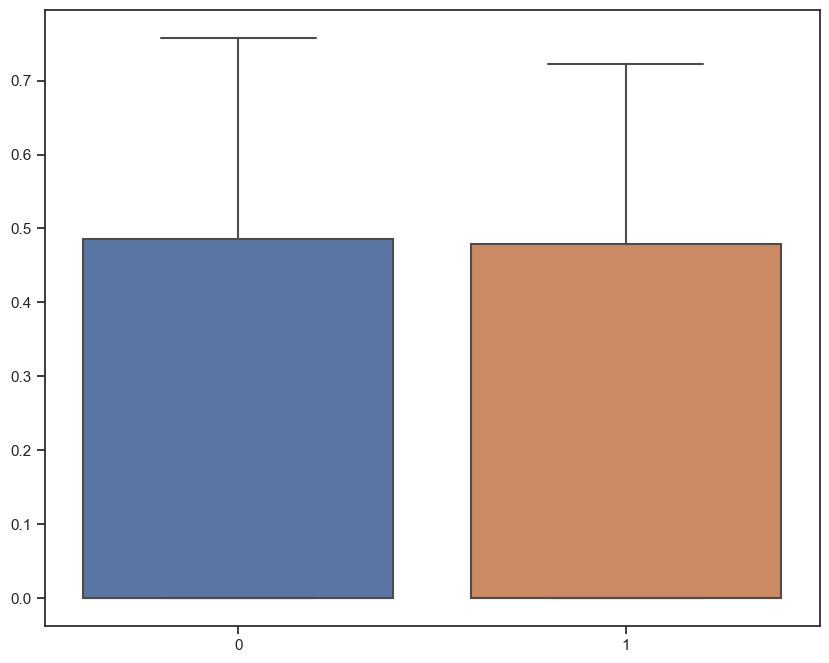

In [27]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_citeseer]

sns.boxplot(data=all_arr, )

In [28]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.195

In [29]:
gini=0
clusters = comm_citeseer
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.195

In [30]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(citeseer_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

NameError: name 'GNN_dist_out_degree' is not defined

In [ ]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(citeseer_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.0197979797979798
p_value 0.7703971506010628
Jaccard Index: 0.27388535031847133
[1422, 582, 2782, 1943, 3193, 2646, 1625, 2899, 1214, 3046, 1620, 1896, 2829, 2174, 2622, 2925, 755, 2339, 1992, 2053, 2784, 2823, 2828, 2824, 2655, 2663, 2826, 2868, 2785, 2398, 1097, 2827, 2234, 2783, 2396, 2585, 2458, 2681, 2139, 1834, 2825, 2861, 2254, 1658, 2703, 2664, 2444, 2650, 1724, 2257, 2911, 1590, 1582, 1470, 2434, 1607, 2649, 2116, 2820, 1879, 1644, 3017, 2244, 2316, 2435, 2475, 2830, 2064, 2597, 2230, 2023, 2822, 2047, 2115, 2021, 2196, 2651, 2840, 2490, 1921, 2821, 2259, 667, 2668, 2181, 879, 1875, 1753, 1525, 2258, 1630, 637, 3217, 1516, 1387, 647, 3216, 1663, 2134, 2249]
[1422, 2782, 1943, 2925, 2829, 1625, 3046, 2597, 1214, 2622, 2703, 2646, 3193, 2899, 1896, 2861, 582, 2633, 1620, 3274, 2174, 1605, 2416, 755, 2655, 2196, 2398, 2596, 2339, 1097, 1567, 1708, 2828, 1875, 2519, 2404, 2217, 2638, 2475, 3249, 2848, 2650, 2361, 2911, 2506, 2427, 2919, 2166, 2418, 2023, 2316, 1992, 1853, 22

In [ ]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_citeseer_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.12161616161616164
p_value 0.0730007017862307
Jaccard Index: 0.7857142857142857
[1422, 1625, 755, 887, 968, 1251, 1943, 582, 468, 1214, 1112, 1097, 1429, 1759, 2226, 1034, 1644, 1875, 2361, 2435, 1666, 1918, 637, 1620, 1117, 1131, 2507, 616, 2651, 2506, 1995, 962, 2622, 2217, 1708, 2596, 2638, 2828, 2021, 2089, 2632, 2782, 1590, 2404, 2196, 2360, 1230, 2519, 1731, 3193, 2447, 1567, 1275, 1724, 2420, 2244, 2257, 2558, 1012, 2230, 541, 2564, 2631, 912, 2868, 1414, 298, 2646, 1617, 2899, 472, 1219, 1879, 2829, 2396, 549, 1399, 2450, 396, 1582, 2443, 1896, 2597, 585, 1965, 796, 1989, 875, 2097, 931, 2362, 2398, 2416, 1070, 373, 1170, 2224, 2189, 661, 2063]
[1422, 1625, 1251, 755, 887, 582, 968, 1943, 1097, 468, 1112, 1429, 1759, 1875, 1214, 2361, 2226, 1620, 1918, 2435, 1644, 1666, 2507, 1995, 1131, 1117, 2596, 2506, 2217, 2638, 2828, 1590, 637, 2089, 2404, 2782, 2257, 1013, 2622, 2360, 2196, 2519, 1034, 3193, 616, 2632, 2447, 1724, 2420, 2244, 1567, 2558, 962, 541, 1731, 1230, 1275,

In [ ]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_citeseer_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.010526315789473684
p_value 0.9744669029388741
Jaccard Index: 0.42857142857142855
[2650, 2633, 2829, 2488, 2427, 2784, 2598, 2925, 2968, 2967, 2649, 2444, 2435, 2564, 2782, 2507, 1666, 2665, 1989, 2110]
[2650, 2829, 2622, 2782, 2435, 2784, 2488, 1422, 2649, 2925, 2444, 2783, 2785, 2681, 2967, 2398, 2830, 2968, 2598, 2651]


In [ ]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_citeseer_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.5450505050505051
p_value 9.361012950033234e-16
Jaccard Index: 0.941747572815534
[2650, 2598, 2883, 2520, 2968, 2507, 2784, 2649, 2967, 2843, 2506, 2665, 2444, 2720, 2829, 2625, 2925, 2783, 2786, 2785, 2842, 3000, 2641, 2564, 2488, 2443, 2882, 2880, 3074, 2718, 2719, 2597, 2490, 2782, 2398, 2397, 2828, 2282, 2827, 2859, 2639, 2640, 3300, 2435, 2361, 2519, 2633, 2645, 3027, 3028, 2396, 2023, 2651, 2830, 2299, 2638, 2919, 2599, 2869, 2870, 2234, 2416, 2418, 2226, 2823, 2775, 2217, 2991, 2427, 2426, 2021, 2622, 2475, 1958, 2253, 2542, 2404, 2247, 2886, 2860, 2621, 3093, 2596, 2846, 3324, 2032, 3308, 2868, 1943, 2089, 3046, 1989, 2110, 1724, 1644, 2230, 2585, 2254, 2681, 2181]
[2650, 2598, 2520, 2883, 2968, 2507, 2784, 2649, 2967, 2843, 2506, 2665, 2444, 2720, 2829, 2625, 2925, 2785, 2783, 2786, 2842, 3000, 2641, 2564, 2488, 2882, 3074, 2880, 2443, 2718, 2719, 2597, 2490, 2782, 2398, 2397, 2828, 2282, 2859, 2827, 2639, 2640, 3300, 2435, 2361, 2633, 2519, 2645, 3027, 3028, 2396, 2023,